In [21]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')


In [22]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [23]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [24]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [29]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(df_market_data)

# Transform the data
df_market_data_scaled = scaler.transform(df_market_data)

# Convert the normalized data back to a DataFrame
df_market_data_scaled = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns)

In [31]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns)

# Copy the crypto names from the original data
df_market_data_scaled['coin_id'] = df_market_data.index

# Set the coin_id column as index
df_market_data_scaled.set_index('coin_id', inplace=True)

# Display sample data
(df_market_data_scaled.head())



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [32]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [33]:
# Create an empty list to store the inertia values
inertia = []

# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k)
    
    # Fit the model to the data using `df_market_data_scaled`
    model.fit(df_market_data_scaled)
    
    # Append the model.inertia_ to the inertia list
    inertia.append(model.inertia_)


In [34]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

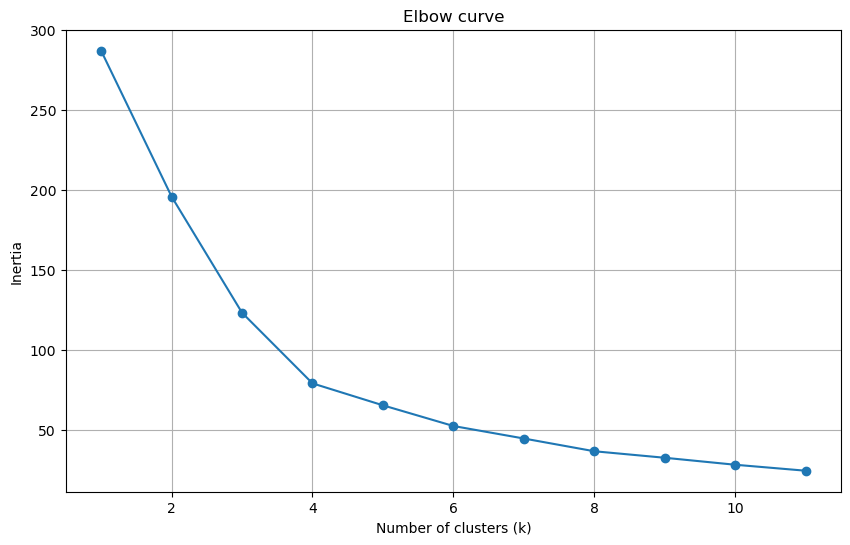

In [36]:
import matplotlib.pyplot as plt
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The value of 4 is the best since that's where the elbow in the curve is most significant.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [37]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [38]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)

KMeans(n_clusters=4)

In [40]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values
(clusters)

array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3])

In [41]:
# Create a copy of the DataFrame
df_market_data_scaled_copy = df_market_data_scaled.copy()


In [43]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_scaled_copy['Cluster'] = clusters

# Display sample data
(df_market_data_scaled_copy.head())

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [44]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_market_data_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    hover_cols='coin_id',
    by='Cluster',
)

scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [45]:
# Create a PCA model instance and set `n_components=3`
pca = PCA(n_components=3)

In [47]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
df_pca = pca.fit_transform(df_market_data_scaled)
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(3)])
# View the first five rows of the DataFrame. 
(df_pca.head())

,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [48]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance: {explained_variance}')

Explained variance: [0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** So, the total explained variance of the three principal components is approximately 89.5%.  This means that these three principal components together capture about 89.5% of the variance in the original data.

In [50]:
# Create a new DataFrame with the PCA data
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(3)])

# Copy the crypto names from the original data
df_pca['coin_id'] = df_market_data.index

# Set the coin_id column as index
df_pca.set_index('coin_id', inplace=True)

# Display sample data
(df_pca.head())

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [51]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [52]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(df_pca)
    inertia.append(model.inertia_)

In [53]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

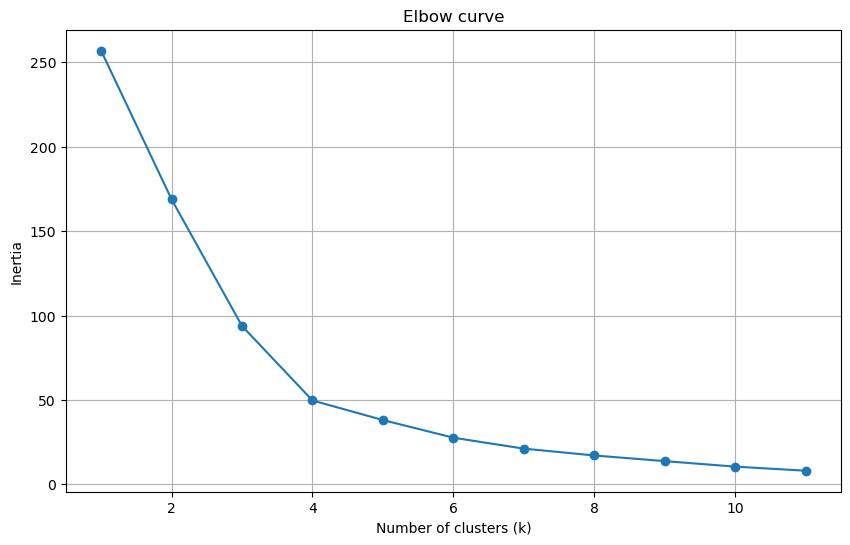

In [54]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4 appears to be the best value for k.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, 4 was also the best value for k using the original data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [55]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [56]:
# Fit the K-Means model using the PCA data
model.fit(df_pca)

KMeans(n_clusters=4)

In [58]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = model.predict(df_pca)

# Print the resulting array of cluster values
(clusters)

array([3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 3, 0, 0, 2, 0, 0, 0, 0])

In [60]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['Cluster'] = clusters

# Display sample data
(df_pca_copy.head())


,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,3
ethereum,-0.458261,0.458466,0.952877,3
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,3


In [61]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_pca_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    hover_cols='coin_id',
    by='Cluster',
)

scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

Text(0, 0.5, 'Inertia')

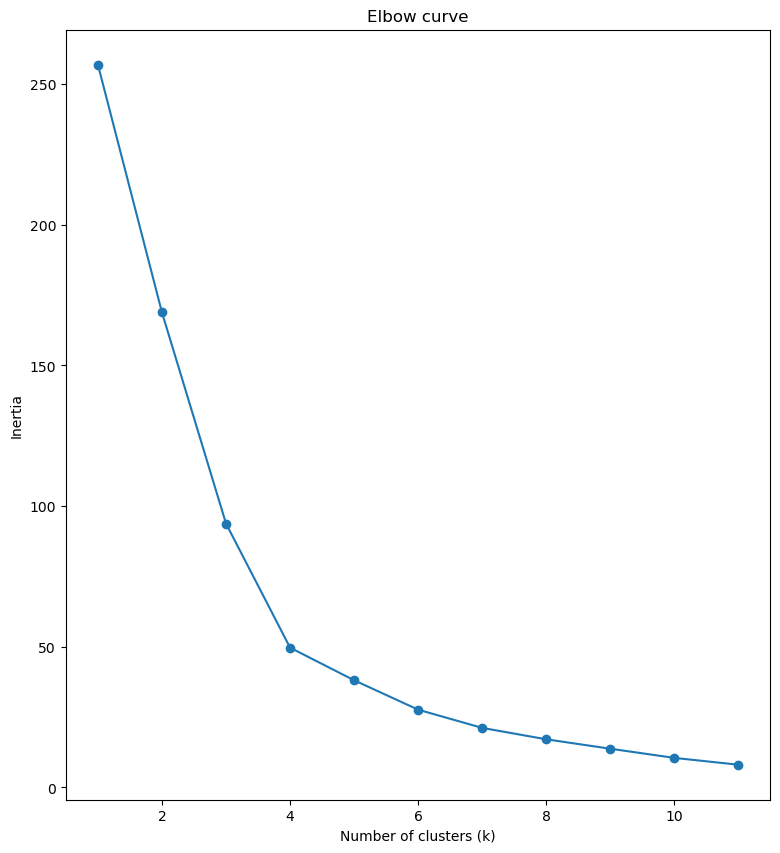

In [62]:
# Composite plot to contrast the Elbow curves
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

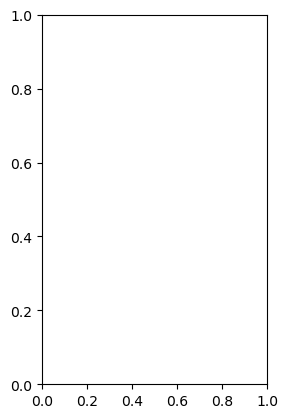

In [63]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
plt.subplot(1, 2, 2)
df_pca_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    hover_cols='coin_id',
    by='Cluster',
)
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using less data can make clustering faster and simpler, but might miss out on important details. So, it’s key to keep a good balance.